In [6]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def parse(line):
    day_str, time_str, height_str = line.split()

    day = int(day_str)
    hour_str, minute_str = time_str.split(":")
    hour_temp = float(hour_str)
    minute = int(minute_str)

    hour = hour_temp + (day * 24) + (minute/60)

    height = float(height_str)

    return hour, height

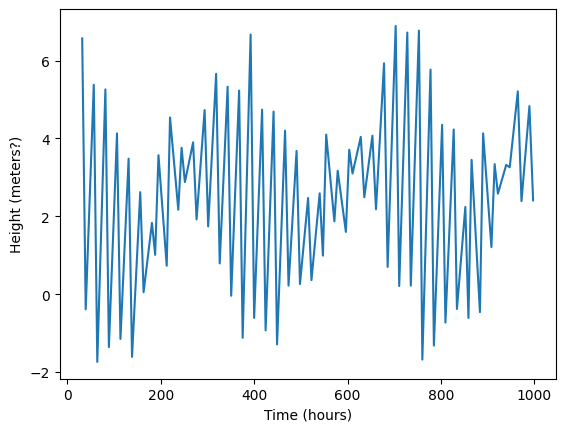

In [7]:
file = open('ASTR19_F25_group_project_data.txt','r')
data = file.readline()
data = file.readline()
data = file.readline()
line = file.readline()
hour_array = []
height_array = []

while line:
    hour_temp, height_temp = parse(line)
    hour_array.append(hour_temp)
    height_array.append(height_temp)
    line = file.readline()

plt.plot(hour_array, height_array)
plt.xlabel("Time (hours)")
plt.ylabel("Height (meters?)")
plt.show()

file.close()